[Feature]<br>
- X_Minimum: 결함이 존재하는 영역의 최소 x 좌표값 <br>
- X_Maximum: 결함이 존재하는 영역의 최대 x 좌표값<br>
- Y_Minimum: 결함이 존재하는 영역의 최소 y 좌표값<br>
- Y_Maximum: 결함이 존재하는 영역의 최대 y 좌표값<br>
- Pixels_Areas: 결함이 존재하는 영역의 픽셀 개수<br>
- X_Perimeter: 결함이 존재하는 영역의 x 방향 둘레 길이<br>
- Y_Perimeter: 결함이 존재하는 영역의 y 방향 둘레 길이<br>
- Sum_of_Luminosity: 결함이 존재하는 영역의 픽셀의 총 빛의 합<br>
- Minimum_of_Luminosity: 결함이 존재하는 영역의 픽셀의 최소 빛의 강도<br>
- Maximum_of_Luminosity: 결함이 존재하는 영역의 픽셀의 최대 빛의 강도<br>
- Length_of_Conveyer: 컨베이어 벨트의 길이<br>
- TypeOfSteel_A300: 강판의 강철 유형(A300 여부)<br>
- TypeOfSteel_A400: 강판의 강철 유형(A400 여부)<br>
- Steel_Plate_Thickness: 강판의 두께<br>
- Edges_Index: 결함이 존재하는 영역의 경계 픽셀 비율<br>
- Empty_Index: 결함이 존재하는 영역의 비어있는 픽셀 비율<br>
- Square_Index: 결함이 존재하는 영역의 정사각형 비율<br>
- Outside_X_Index: 결함이 존재하는 영역의 x 방향 경계 비율<br>
- Edges_X_Index: 결함이 존재하는 영역의 x 방향 경계 픽셀 수 비율<br>
- Edges_Y_Index: 결함이 존재하는 영역의 y 방향 경계 픽셀 수 비율<br>
- Outside_Global_Index: 결함이 존재하는 영역의 외부 경계 인덱스<br>
- LogOfAreas: 결함이 존재하는 영역의 픽셀 면적의 로그 값<br>
- Log_X_Index: 결함이 존재하는 영역의 x 방향 픽셀 면적의 로그 값<br>
- Log_Y_Index: 결함이 존재하는 영역의 y 방향 픽셀 면적의 로그 값<br>
- Orientation_Index: 결함이 존재하는 영역의 방향 지수<br>
- Luminosity_Index: 결함이 존재하는 영역의 빛의 지수<br>
- SigmoidOfAreas: 결함이 존재하는 영역의 픽셀 면적의 시그모이드 값<br>


[Target]<br>
- Pastry: 파이스트리(도포물 뭉침 등)<br>
- Z_Scratch: Z 모양 스크래치<br>
- K_Scratch: K 모양 스크래치<br>
- Stains: 얼룩 (오일 드랍 등) <br>
- Dirtiness: 더러움 (벗겨지거나 일어난) <br>
- Bumps: 돌출(혹) <br>
- Other_Faults: 기타<br>

# Library

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
# 소수점 4자리까지 보이도록 설정
pd.set_option('display.float_format', '{:,.4f}'.format)

### 데이터 불러오기

In [52]:
df = pd.read_csv('data/mulit_classification_data.csv')
df

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,249,277,325780,325796,273,54,22,35033,119,141,...,-0.4286,0.0026,0.7254,0,0,0,0,0,0,1
1937,144,175,340581,340598,287,44,24,34599,112,133,...,-0.4516,-0.0582,0.8173,0,0,0,0,0,0,1
1938,145,174,386779,386794,292,40,22,37572,120,140,...,-0.4828,0.0052,0.7079,0,0,0,0,0,0,1
1939,137,170,422497,422528,419,97,47,52715,117,140,...,-0.0606,-0.0171,0.9919,0,0,0,0,0,0,1


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1941 non-null   int64  
 1   X_Maximum              1941 non-null   int64  
 2   Y_Minimum              1941 non-null   int64  
 3   Y_Maximum              1941 non-null   int64  
 4   Pixels_Areas           1941 non-null   int64  
 5   X_Perimeter            1941 non-null   int64  
 6   Y_Perimeter            1941 non-null   int64  
 7   Sum_of_Luminosity      1941 non-null   int64  
 8   Minimum_of_Luminosity  1941 non-null   int64  
 9   Maximum_of_Luminosity  1941 non-null   int64  
 10  Length_of_Conveyer     1941 non-null   int64  
 11  TypeOfSteel_A300       1941 non-null   int64  
 12  TypeOfSteel_A400       1941 non-null   int64  
 13  Steel_Plate_Thickness  1941 non-null   int64  
 14  Edges_Index            1941 non-null   float64
 15  Empt

In [54]:
df[['Pixels_Areas','LogOfAreas']]

,Pixels_Areas,LogOfAreas
0,267,2.4265
1,108,2.0334
2,71,1.8513
3,176,2.2455
4,2409,3.3818
...,...,...
1936,273,2.4362
1937,287,2.4579
1938,292,2.4654
1939,419,2.6222


### 결측치-중복치 처리

In [14]:
# 컬럼별 결측치수 확인
df.isnull().sum()

X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
Pastry                   0
Z_Scratch                0
K_Scatch                 0
Stains                   0
Dirtiness                0
Bumps                    0
Other_Faults             0
dtype: int64

In [15]:
# 중복된 데이터수 확인
df.duplicated().sum()

0

In [16]:
# index reset
df.reset_index(drop=True, inplace=True)
df.shape

(1941, 34)

### Feature 컬럼 분포 확인

In [17]:
# 카디널리티 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1941 non-null   int64  
 1   X_Maximum              1941 non-null   int64  
 2   Y_Minimum              1941 non-null   int64  
 3   Y_Maximum              1941 non-null   int64  
 4   Pixels_Areas           1941 non-null   int64  
 5   X_Perimeter            1941 non-null   int64  
 6   Y_Perimeter            1941 non-null   int64  
 7   Sum_of_Luminosity      1941 non-null   int64  
 8   Minimum_of_Luminosity  1941 non-null   int64  
 9   Maximum_of_Luminosity  1941 non-null   int64  
 10  Length_of_Conveyer     1941 non-null   int64  
 11  TypeOfSteel_A300       1941 non-null   int64  
 12  TypeOfSteel_A400       1941 non-null   int64  
 13  Steel_Plate_Thickness  1941 non-null   int64  
 14  Edges_Index            1941 non-null   float64
 15  Empt

In [18]:
feature_list = df.columns[:27]
target_list = df.columns[27:]

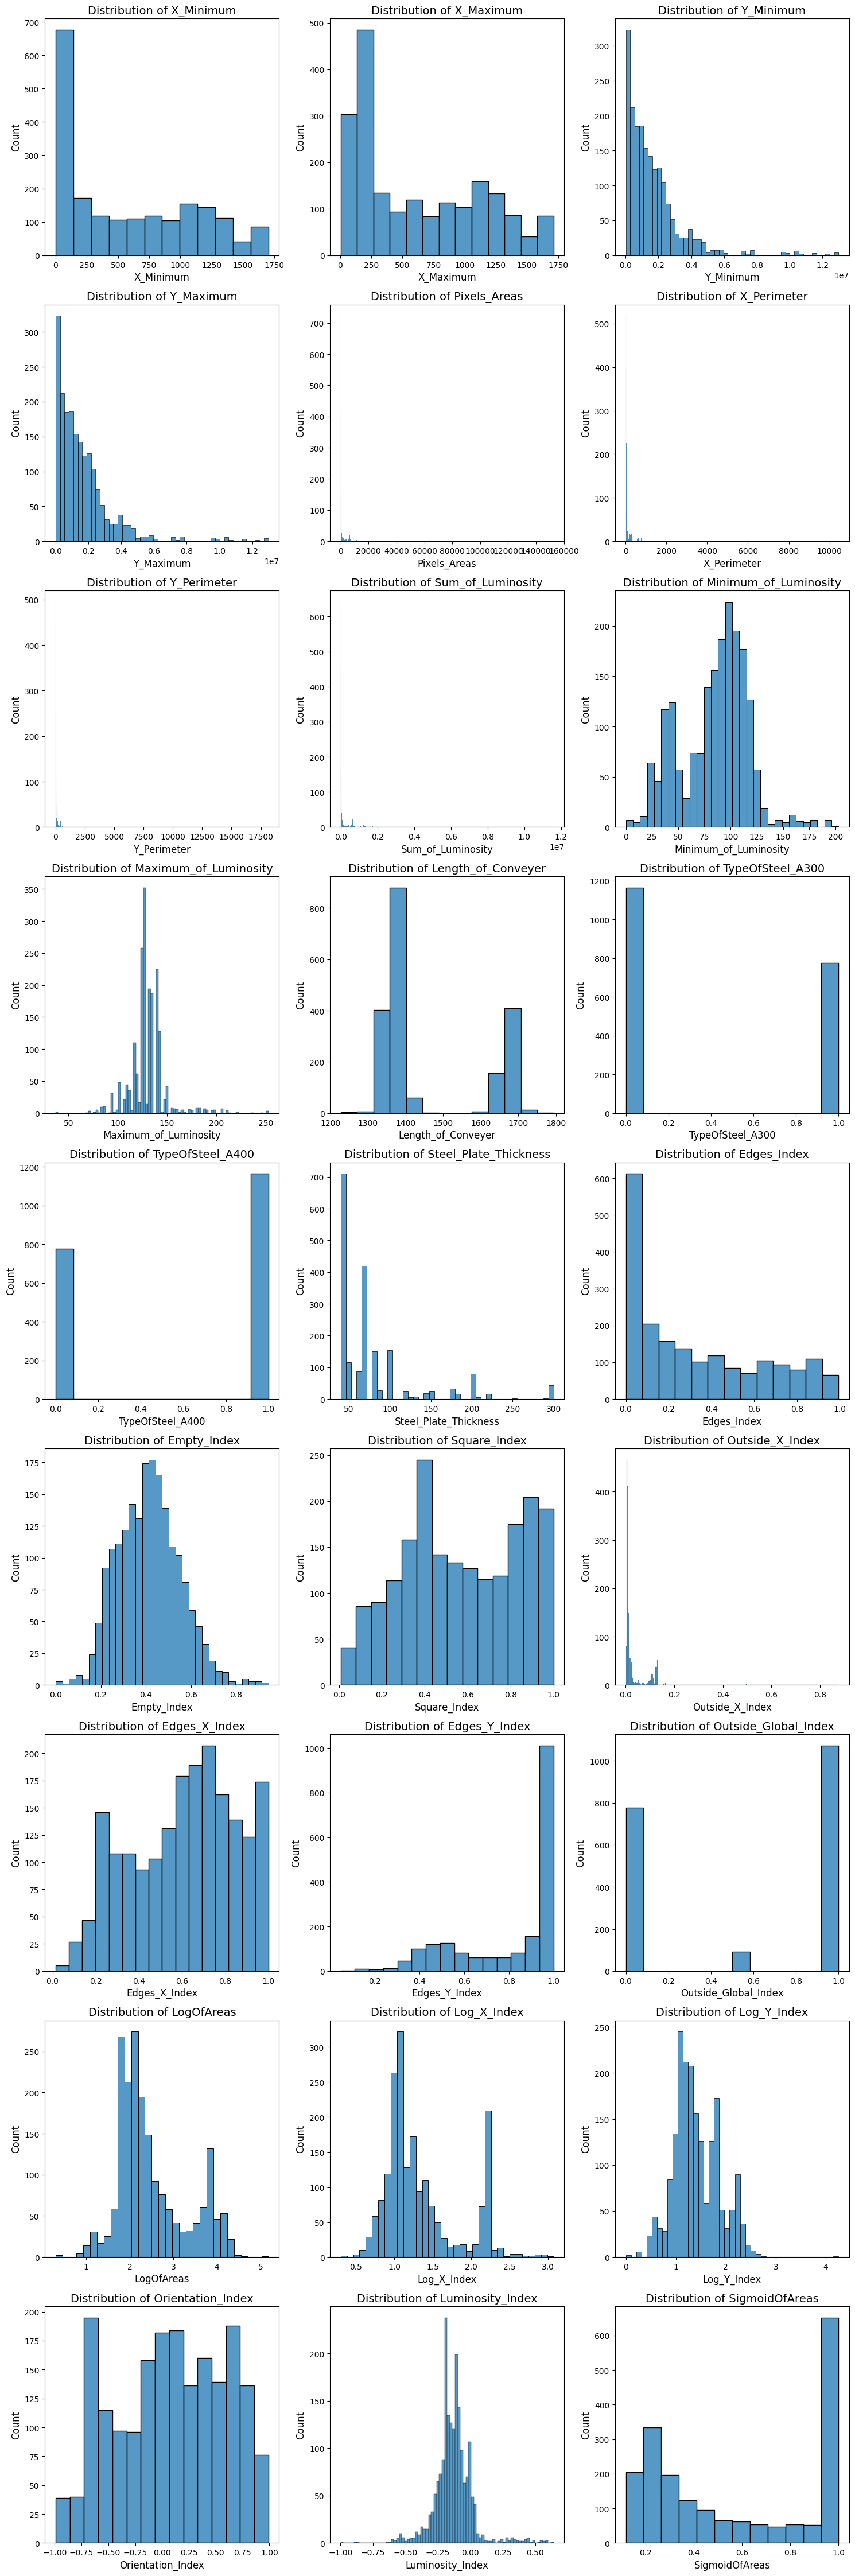

In [19]:
# feature 분포 확인 (세로 막대 그래프)

# 그래프 배치 설정
num_cols = 3  # 한 줄에 배치할 그래프 개수
num_rows = 9  # 필요한 행 개수 계산

# 각 컬럼에 대한 밸류 분포 시각화
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))  # 그래프 크기 설정

for i, column in enumerate(feature_list):
    ax = axes[i // num_cols, i % num_cols]  # 그래프 위치 설정
    sns.histplot(data=df, x=column, ax=ax)  # 히스토그램을 이용한 분포 시각화
    ax.set_title(f"Distribution of {column}", fontsize=14)  # 그래프 제목 설정
    ax.set_xlabel(column, fontsize=12)  # x축 레이블 설정
    ax.set_ylabel("Count", fontsize=12)  # y축 레이블 설정

plt.tight_layout()  # 그래프 간격 조정
plt.show()  # 그래프 출력

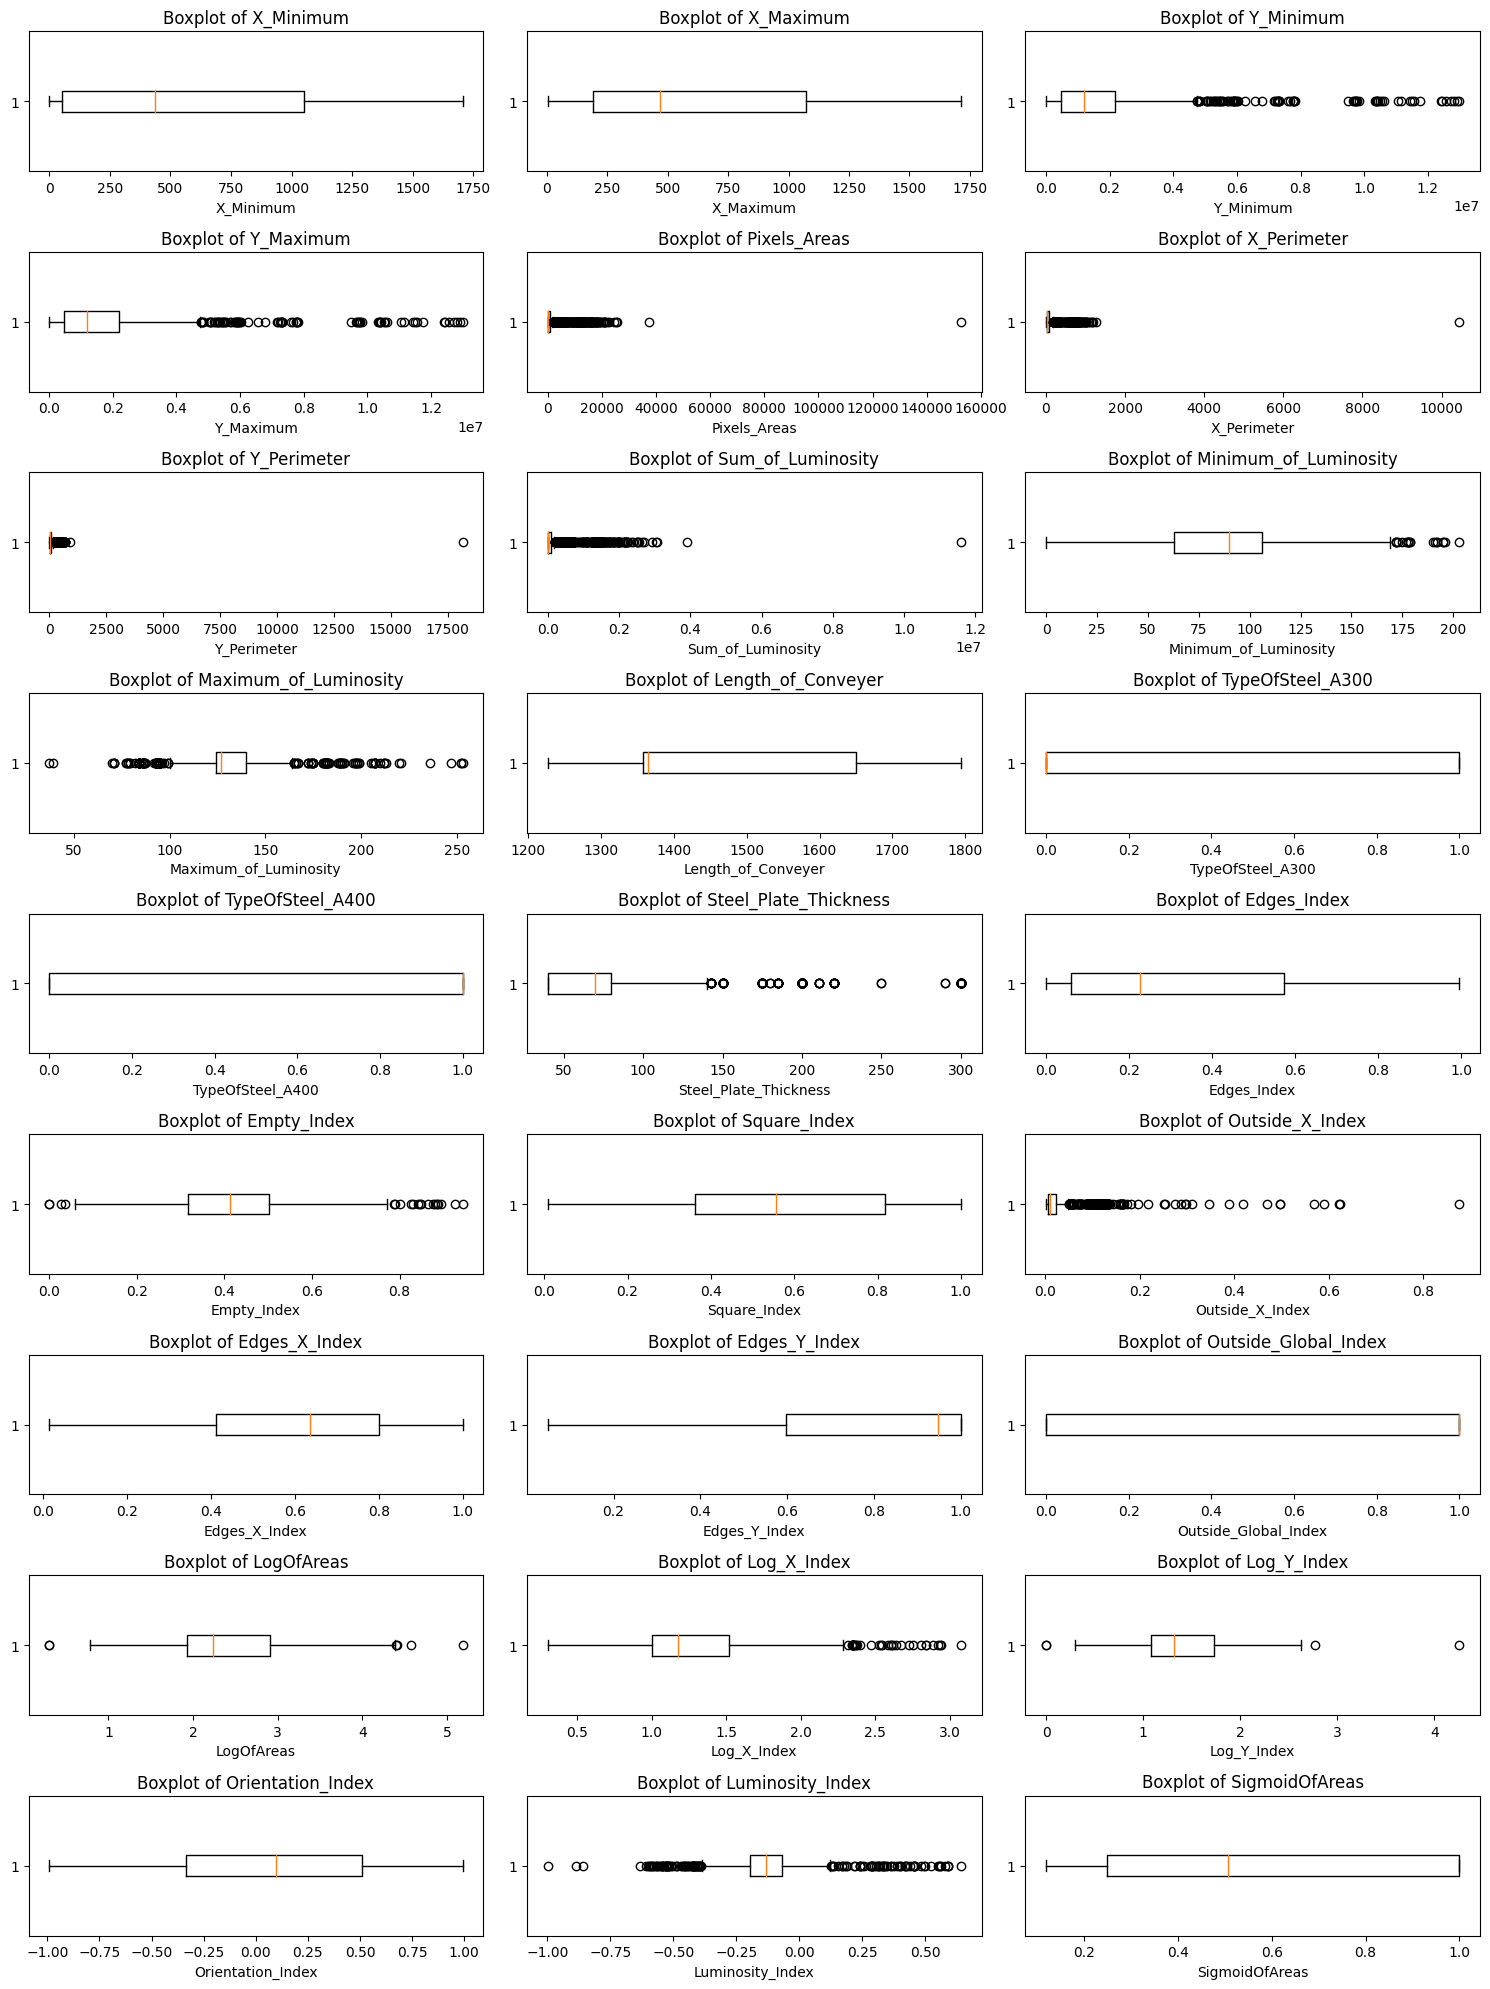

In [20]:
# 이상치 분포 확인 (박스 플롯)

# 박스플롯 시각화
plt.figure(figsize=(15, 20))  # 그래프 크기 설정
num_plots = len(feature_list)

for i, column in enumerate(feature_list):
    plt.subplot((num_plots+2)//3, 3, i+1)  # 그래프 위치 설정
    plt.boxplot(df[column], vert=False)  # 박스플롯 시각화
    plt.title(f"Boxplot of {column}", fontsize=12)  # 그래프 제목 설정
    plt.xlabel(column, fontsize=10)  # x축 레이블 설정

plt.tight_layout()  # 그래프 간격 조정
plt.show()  # 그래프 출력


In [21]:
# 강판 종류 분포 확인
type_counts = df[['TypeOfSteel_A300', 'TypeOfSteel_A400']].sum()
type_counts

TypeOfSteel_A300     777
TypeOfSteel_A400    1164
dtype: int64

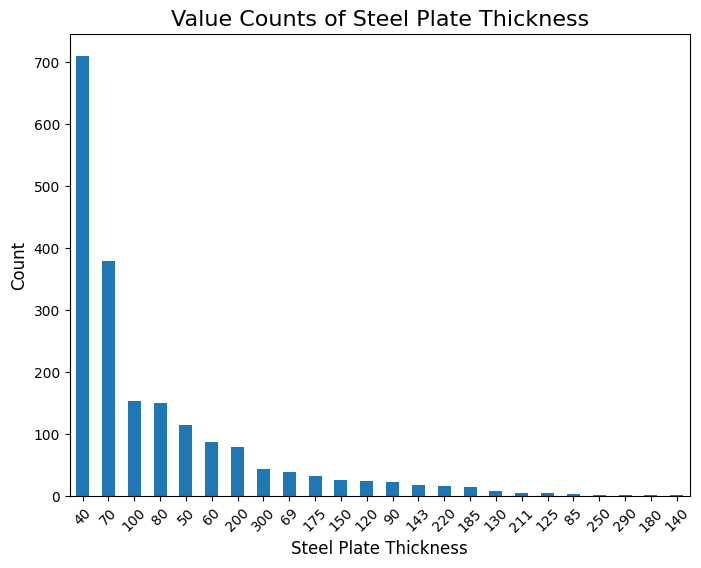

In [22]:
# 'Steel_Plate_Thickness' 컬럼의 각 값의 갯수 세기
value_counts = df['Steel_Plate_Thickness'].value_counts()

# 시각화
plt.figure(figsize=(8, 6))  # 그래프 크기 설정
value_counts.plot(kind='bar')  # 막대 그래프로 시각화
plt.title("Value Counts of Steel Plate Thickness", fontsize=16)  # 그래프 제목 설정
plt.xlabel("Steel Plate Thickness", fontsize=12)  # x축 레이블 설정
plt.ylabel("Count", fontsize=12)  # y축 레이블 설정
plt.xticks(rotation=45)  # x축 레이블 회전
plt.show()  # 그래프 출력

### 이상치 확인

In [23]:
filtered_df = df[df['Pixels_Areas'] > 35000]
filtered_df[df.columns[-7:]]

,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
391,0,0,1,0,0,0,0
1592,0,0,0,0,0,0,1


In [24]:
filtered_df = df[df['X_Perimeter'] > 10000]
filtered_df[df.columns[-7:]]

,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
391,0,0,1,0,0,0,0


In [25]:
filtered_df = df[df['Y_Perimeter'] > 10000]
filtered_df[df.columns[-7:]]

,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
391,0,0,1,0,0,0,0


In [26]:
filtered_df = df[df['Sum_of_Luminosity'] > 3800000]
filtered_df[df.columns[-7:]]

,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
391,0,0,1,0,0,0,0
1592,0,0,0,0,0,0,1


In [27]:
print(f'Maximum_of_Luminosity : {df["Maximum_of_Luminosity"].min()}~{df["Maximum_of_Luminosity"].max()}')
print(f'Minimum_of_Luminosity : {df["Minimum_of_Luminosity"].min()}~{df["Minimum_of_Luminosity"].max()}')


Maximum_of_Luminosity : 37~253
Minimum_of_Luminosity : 0~203


In [29]:
filtered_df = df[df['Log_Y_Index'] > 2.7]
filtered_df[df.columns[-7:]]

,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
83,1,0,0,0,0,0,0
391,0,0,1,0,0,0,0


## 컬럼 분석

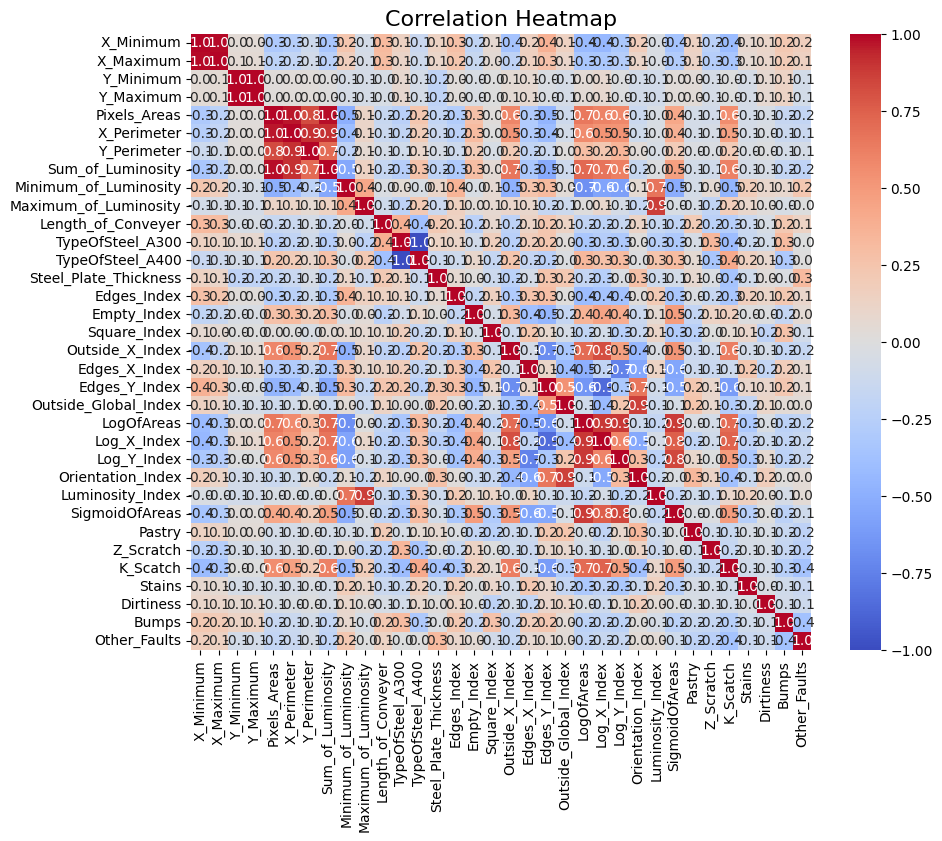

In [30]:
# 상관 분석
corr_matrix = df.corr()

# 히트맵 그리기
plt.figure(figsize=(10, 8))  # 그래프 크기 설정
sns.heatmap(corr_matrix, annot=True, fmt='.1f', cmap='coolwarm')  # 히트맵 그리기
plt.title("Correlation Heatmap", fontsize=16)  # 그래프 제목 설정
plt.show()  # 그래프 출력

In [31]:
# 0.9 이상인 상관 계수를 가지는 컬럼 쌍 찾기
high_correlation_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) >= 0.9:
            high_correlation_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j]))

# 결과 출력
for pair in high_correlation_pairs:
    print(pair)

('X_Minimum', 'X_Maximum')
('Y_Minimum', 'Y_Maximum')
('Pixels_Areas', 'X_Perimeter')
('Pixels_Areas', 'Sum_of_Luminosity')
('X_Perimeter', 'Y_Perimeter')
('X_Perimeter', 'Sum_of_Luminosity')
('TypeOfSteel_A300', 'TypeOfSteel_A400')


In [32]:
# 0.8 이상인 상관 계수를 가지는 컬럼 쌍 찾기
high_correlation_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) >= 0.8 and abs(corr_matrix.iloc[i, j]) < 0.9:
            high_correlation_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j]))

# 결과 출력
for pair in high_correlation_pairs:
    print(pair)

('Pixels_Areas', 'Y_Perimeter')
('Maximum_of_Luminosity', 'Luminosity_Index')
('Outside_X_Index', 'Log_X_Index')
('Edges_Y_Index', 'Log_X_Index')
('Outside_Global_Index', 'Orientation_Index')
('LogOfAreas', 'Log_X_Index')
('LogOfAreas', 'Log_Y_Index')
('LogOfAreas', 'SigmoidOfAreas')
('Log_Y_Index', 'SigmoidOfAreas')


In [33]:
# 0.7 이상인 상관 계수를 가지는 컬럼 쌍 찾기
high_correlation_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) >= 0.7 and abs(corr_matrix.iloc[i, j]) < 0.8:
            high_correlation_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j]))

# 결과 출력
for pair in high_correlation_pairs:
    print(pair)

('Y_Perimeter', 'Sum_of_Luminosity')
('Sum_of_Luminosity', 'LogOfAreas')
('Outside_X_Index', 'LogOfAreas')
('Edges_X_Index', 'Log_Y_Index')
('LogOfAreas', 'K_Scatch')
('Log_X_Index', 'SigmoidOfAreas')
('Log_X_Index', 'K_Scatch')


In [34]:
# 0.6 이상인 상관 계수를 가지는 컬럼 쌍 찾기
high_correlation_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) >= 0.6 and abs(corr_matrix.iloc[i, j]) < 0.7:
            high_correlation_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j]))

# 결과 출력
for pair in high_correlation_pairs:
    print(pair)

('Pixels_Areas', 'LogOfAreas')
('Pixels_Areas', 'Log_X_Index')
('Sum_of_Luminosity', 'Outside_X_Index')
('Sum_of_Luminosity', 'Log_X_Index')
('Sum_of_Luminosity', 'Log_Y_Index')
('Sum_of_Luminosity', 'K_Scatch')
('Minimum_of_Luminosity', 'LogOfAreas')
('Minimum_of_Luminosity', 'Luminosity_Index')
('Outside_X_Index', 'Edges_Y_Index')
('Outside_X_Index', 'K_Scatch')
('Edges_Y_Index', 'LogOfAreas')
('Edges_Y_Index', 'Orientation_Index')
('Edges_Y_Index', 'K_Scatch')


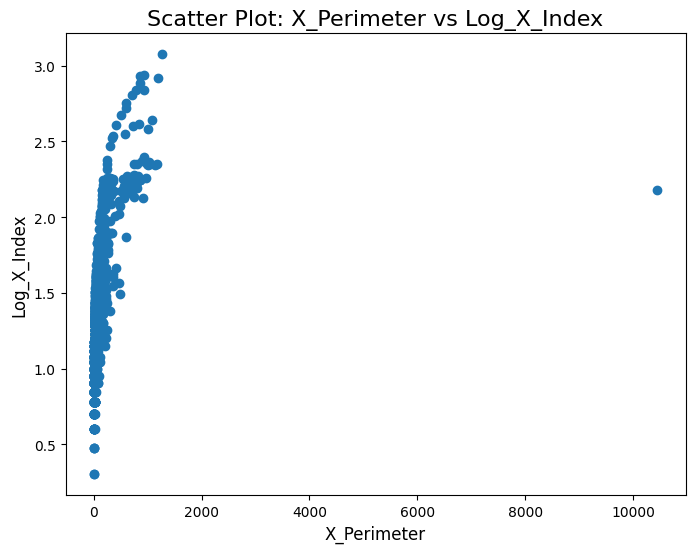

In [35]:
# X_Perimeter / Log_X_Index scatter plot

# 산점도 그리기
plt.figure(figsize=(8, 6))  # 그래프 크기 설정
plt.scatter(df['X_Perimeter'], df['Log_X_Index'])  # 산점도 그리기
plt.title('Scatter Plot: X_Perimeter vs Log_X_Index', fontsize=16)  # 그래프 제목 설정
plt.xlabel('X_Perimeter', fontsize=12)  # x축 레이블 설정
plt.ylabel('Log_X_Index', fontsize=12)  # y축 레이블 설정
plt.show()  # 그래프 출력

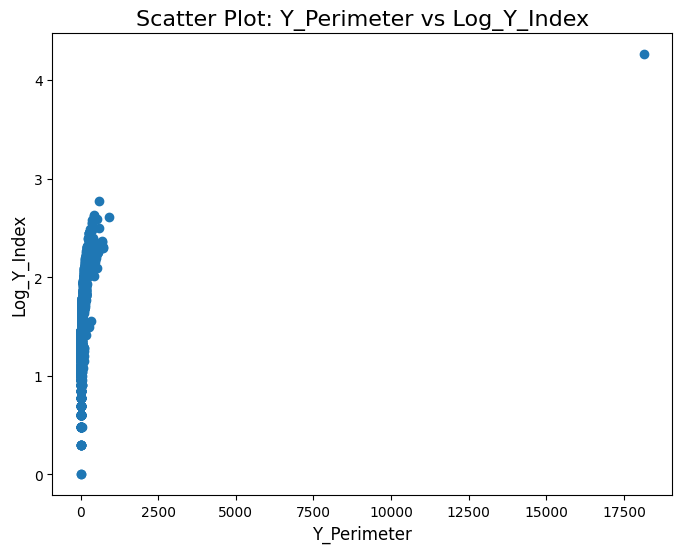

In [36]:
# Y_Perimeter / Log_Y_Index scatter plot

# 산점도 그리기
plt.figure(figsize=(8, 6))  # 그래프 크기 설정
plt.scatter(df['Y_Perimeter'], df['Log_Y_Index'])  # 산점도 그리기
plt.title('Scatter Plot: Y_Perimeter vs Log_Y_Index', fontsize=16)  # 그래프 제목 설정
plt.xlabel('Y_Perimeter', fontsize=12)  # x축 레이블 설정
plt.ylabel('Log_Y_Index', fontsize=12)  # y축 레이블 설정
plt.show()  # 그래프 출력

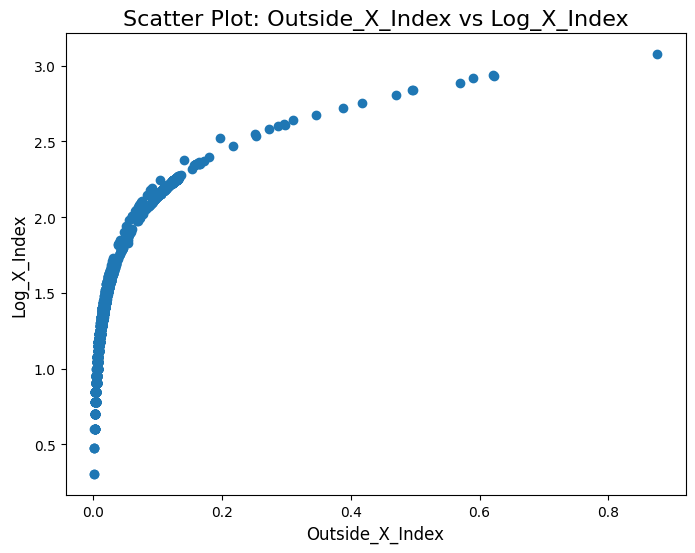

In [37]:
# Outside_X_Index / Log_X_Index scatter plot

# 산점도 그리기
plt.figure(figsize=(8, 6))  # 그래프 크기 설정
plt.scatter(df['Outside_X_Index'], df['Log_X_Index'])  # 산점도 그리기
plt.title('Scatter Plot: Outside_X_Index vs Log_X_Index', fontsize=16)  # 그래프 제목 설정
plt.xlabel('Outside_X_Index', fontsize=12)  # x축 레이블 설정
plt.ylabel('Log_X_Index', fontsize=12)  # y축 레이블 설정
plt.show()  # 그래프 출력

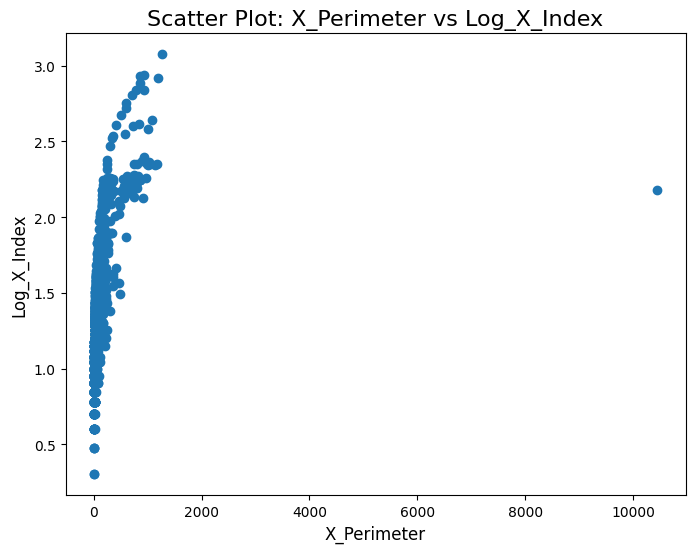

In [38]:
# X_Perimeter / Log_X_Index scatter plot

# 산점도 그리기
plt.figure(figsize=(8, 6))  # 그래프 크기 설정
plt.scatter(df['X_Perimeter'], df['Log_X_Index'])  # 산점도 그리기
plt.title('Scatter Plot: X_Perimeter vs Log_X_Index', fontsize=16)  # 그래프 제목 설정
plt.xlabel('X_Perimeter', fontsize=12)  # x축 레이블 설정
plt.ylabel('Log_X_Index', fontsize=12)  # y축 레이블 설정
plt.show()  # 그래프 출력

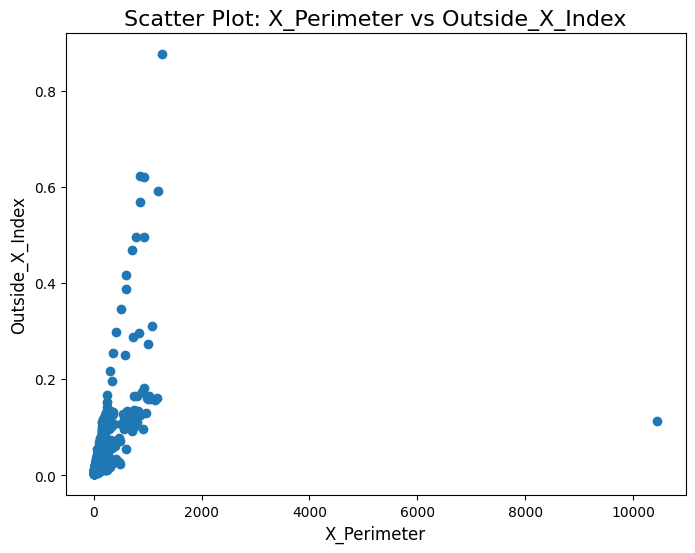

In [39]:
# X_Perimeter / Outside_X_Index scatter plot

# 산점도 그리기
plt.figure(figsize=(8, 6))  # 그래프 크기 설정
plt.scatter(df['X_Perimeter'], df['Outside_X_Index'])  # 산점도 그리기
plt.title('Scatter Plot: X_Perimeter vs Outside_X_Index', fontsize=16)  # 그래프 제목 설정
plt.xlabel('X_Perimeter', fontsize=12)  # x축 레이블 설정
plt.ylabel('Outside_X_Index', fontsize=12)  # y축 레이블 설정
plt.show()  # 그래프 출력

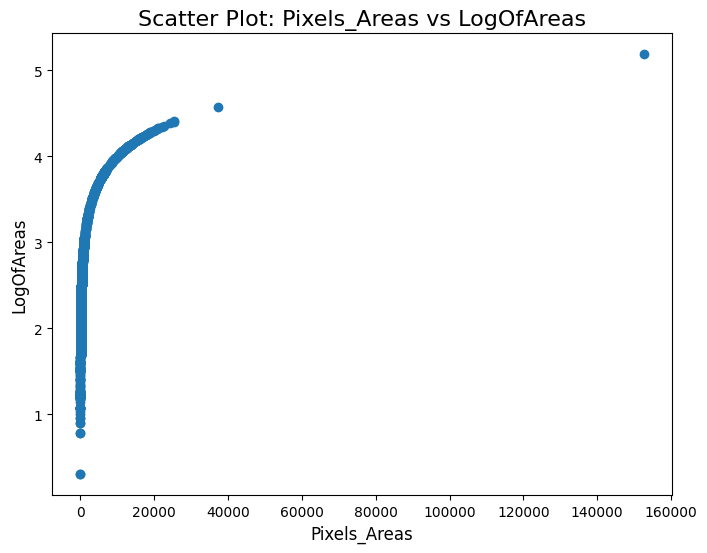

In [40]:
# Pixels_Areas / LogOfAreas scatter plot

# 산점도 그리기
plt.figure(figsize=(8, 6))  # 그래프 크기 설정
plt.scatter(df['Pixels_Areas'], df['LogOfAreas'])  # 산점도 그리기
plt.title('Scatter Plot: Pixels_Areas vs LogOfAreas', fontsize=16)  # 그래프 제목 설정
plt.xlabel('Pixels_Areas', fontsize=12)  # x축 레이블 설정
plt.ylabel('LogOfAreas', fontsize=12)  # y축 레이블 설정
plt.show()  # 그래프 출력

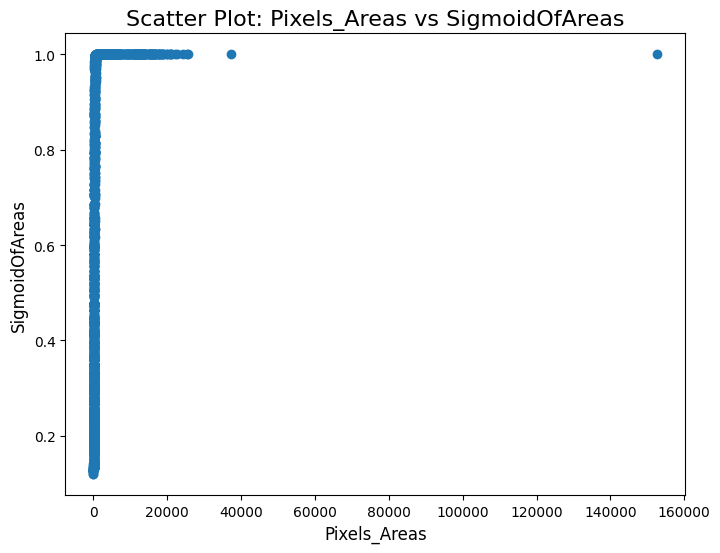

In [41]:
# Pixels_Areas / SigmoidOfAreas scatter plot

# 산점도 그리기
plt.figure(figsize=(8, 6))  # 그래프 크기 설정
plt.scatter(df['Pixels_Areas'], df['SigmoidOfAreas'])  # 산점도 그리기
plt.title('Scatter Plot: Pixels_Areas vs SigmoidOfAreas', fontsize=16)  # 그래프 제목 설정
plt.xlabel('Pixels_Areas', fontsize=12)  # x축 레이블 설정
plt.ylabel('SigmoidOfAreas', fontsize=12)  # y축 레이블 설정
plt.show()  # 그래프 출력

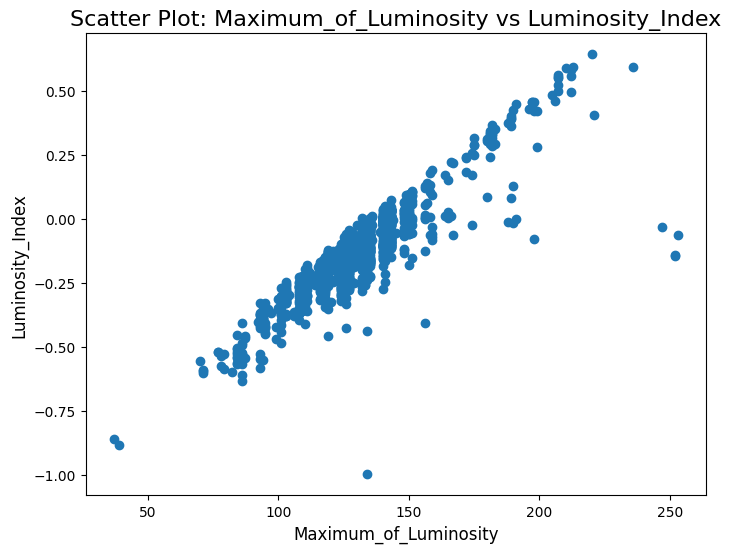

In [42]:
# Maximum_of_Luminosity / Luminosity_Index scatter plot

# 산점도 그리기
plt.figure(figsize=(8, 6))  # 그래프 크기 설정
plt.scatter(df['Maximum_of_Luminosity'], df['Luminosity_Index'])  # 산점도 그리기
plt.title('Scatter Plot: Maximum_of_Luminosity vs Luminosity_Index', fontsize=16)  # 그래프 제목 설정
plt.xlabel('Maximum_of_Luminosity', fontsize=12)  # x축 레이블 설정
plt.ylabel('Luminosity_Index', fontsize=12)  # y축 레이블 설정
plt.show()  # 그래프 출력

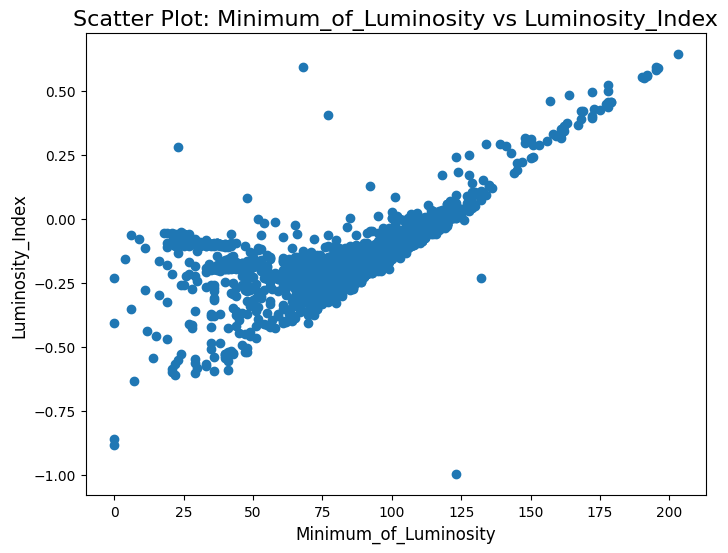

In [43]:
# Minimum_of_Luminosity / Luminosity_Index scatter plot

# 산점도 그리기
plt.figure(figsize=(8, 6))  # 그래프 크기 설정
plt.scatter(df['Minimum_of_Luminosity'], df['Luminosity_Index'])  # 산점도 그리기
plt.title('Scatter Plot: Minimum_of_Luminosity vs Luminosity_Index', fontsize=16)  # 그래프 제목 설정
plt.xlabel('Minimum_of_Luminosity', fontsize=12)  # x축 레이블 설정
plt.ylabel('Luminosity_Index', fontsize=12)  # y축 레이블 설정
plt.show()  # 그래프 출력

In [46]:
# 새로운 컬럼 생성 : 픽셀당 밝기 평균
df['Luminosity_Density'] = df['Sum_of_Luminosity'] / df['Pixels_Areas']

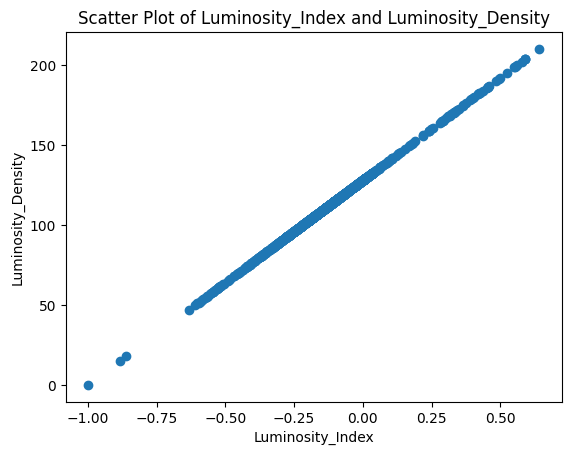

In [49]:
# 새로운 컬럼과 Luminosity_Index의 관계를 알기위해 scatter plot 그리기
plt.scatter(df['Luminosity_Index'], df['Luminosity_Density'])
plt.xlabel('Luminosity_Index')
plt.ylabel('Luminosity_Density')
plt.title('Scatter Plot of Luminosity_Index and Luminosity_Density')
plt.show()

### target 분포 확인

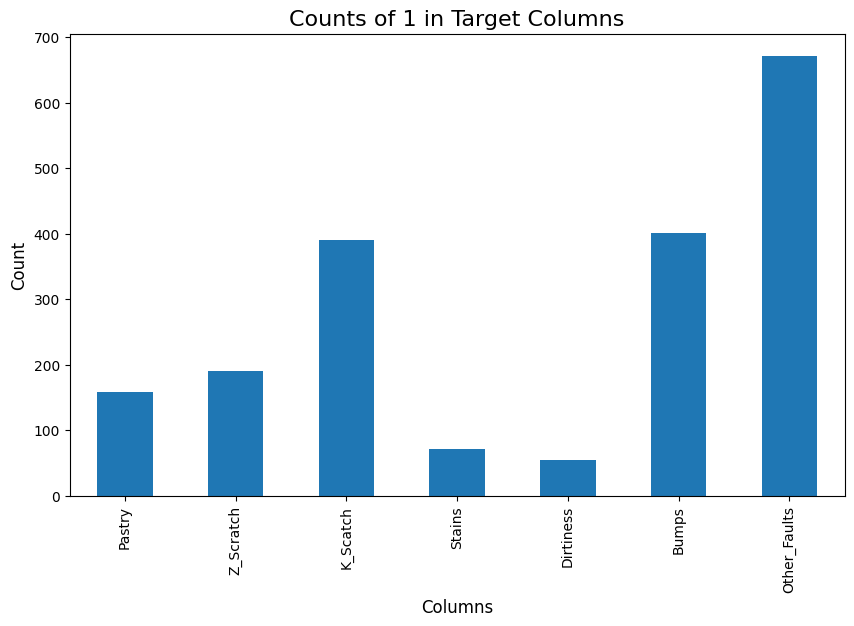

In [167]:

# 컬럼별 1의 갯수 세기
counts = df[target_list].sum()

# 시각화
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
counts.plot(kind='bar')  # 막대 그래프로 시각화
plt.title("Counts of 1 in Target Columns", fontsize=16)  # 그래프 제목 설정
plt.xlabel("Columns", fontsize=12)  # x축 레이블 설정
plt.ylabel("Count", fontsize=12)  # y축 레이블 설정
plt.show()  # 그래프 출력

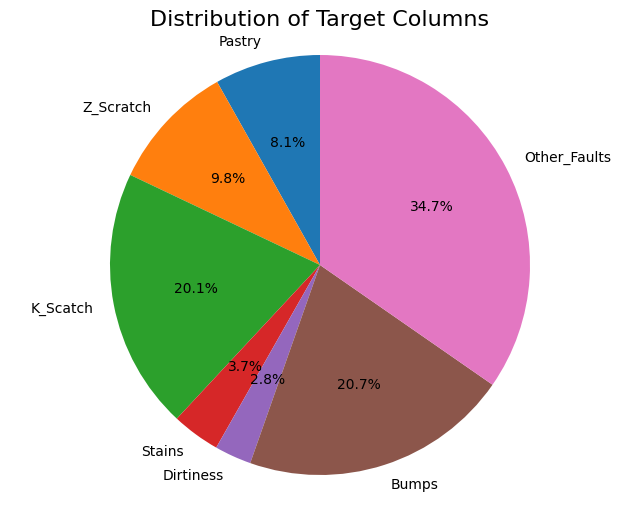

In [168]:

# 파이 차트 그리기
plt.figure(figsize=(8, 6))  # 그래프 크기 설정
plt.pie(counts, labels=target_list, autopct='%1.1f%%', startangle=90)  # 파이 차트 그리기
plt.title('Distribution of Target Columns', fontsize=16)  # 그래프 제목 설정
plt.axis('equal')  # 파이 차트를 원형으로 설정
plt.show()  # 그래프 출력